### In this project, 4 Dark Matter density profiles are being tested. 


(1) NFW profile (2 parameters):

$ \   $  $ \rho \left( r \right) \propto \frac{1}{{\left( r/a \right)}{\left[ 1~+~{{\left( r/a \right)}} \right]}^{2}} $


(2) Isothermal profile (2 parameters):

$ \ $   $  \rho \left( r \right) \propto \frac{1}{{\left[ 1~+~{{\left( r/a \right)}^{2}} \right]}} $


(3) Einasto profile (3 parameters):

$ \   $  $ \rho \left( r \right) \propto \exp^{- A r ^\alpha} $


(4) Generalized DM profile (5 parameters):

$ \   $  $ \rho \left( r \right) \propto    \frac{1}{{\left( r/a \right)}^{\gamma}{\left[ 1~+~{{\left( r/a \right)}^{\alpha}} \right]}^{ \frac{(\beta - \gamma)}{\alpha}}} $



### We can calcuate rotational curve from Dark Matter density profiles, by assuming dark matter distribution is spherically symmetric

$ \frac{GMm}{4 \pi  R^2} = \frac {m v^2}{R}$  where $M=\int_{R_o}^{R} \rho (r) dr$

$v = \sqrt { \frac{ G   \int_{R_o}^{R} \rho (r) dr} {4 \pi  R}  }   $

In [ ]:
  #  !!!! pip install nestle  (from terminal)
    
# !conda install -y -c conda-forge nestle (somehow couldn't find nestle)

In [19]:
import numpy as np
import nestle

import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [47]:




# data_x =  distance to the center of the galaxy 
data_x = np.array([0.2,0.38,0.66,1.61,2.57,3.59,4.51,5.53,6.5,7.56,8.34,9.45,10.5,11.44,12.51,13.53,14.59,16.05,18.64,26.3,28.26,29.51,
32.04,33.99,36.49,38.41,40.42,42.4,44.49,
45.99,48.06,49.49,51.39,53.89,56.89,57.98,60.92,64.73,69.31,72.96,76.95,81.13,84.9,89.35,92.44,
97.41,100.72,106.77,119.98,189.49])

# data_y  =  ratational velocity
data_y = np.array([233,268.92,250.75,217.83,219.58,223.11,247.88,253.14,270.95,267.8,270.52,235.58,249.72,261.96,
284.3,271.54,251.43,320.7,286.46,189.64,237.99,209.82,179.14,170.37,175.92,191.57,197.59,192.79,
213.22,179.39,213.03,178.57,183.31,157.89,191.76,210.72,168.02,206.47,203.62,190.53,222.72,186.29,122.25,
143.95,154.66,184,108.68,137.15,150.18,125.01])
# data_yerr  =  the error of ratational velocity 
data_yerr = np.array([13.32,4.67,11.35,5.81,1.48,2.43,2.99,1.69,2.19,0.96,0.66,8.44,13.44,11.71,17.5,15.57,25.6,
25.27,101.18,6.74,11.54,9.16,6.65,6.93,6.62,11.73,14.12,5.92,17.17,11.23,24.72,17.63,23.58,
19.57,24.35,29.81,25.67,36.27,40.89,40.98,74.37,66.53,36.46,29.49,67.23,72.86,40.99,53.17,25.46,37.32])

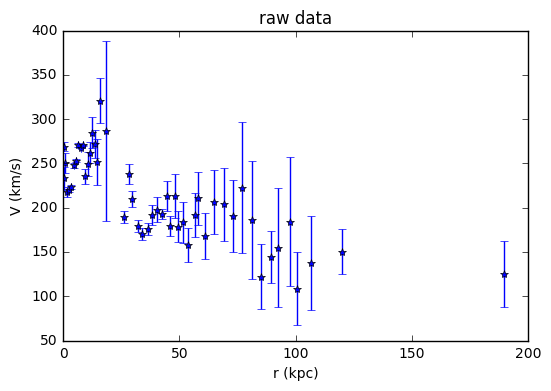

In [48]:
data_xerr = 0
plt.figure()
plt.errorbar(data_x,data_y,data_yerr,data_xerr,fmt='*')
plt.xlabel("r (kpc)")
plt.ylabel('V (km/s)')
plt.title("raw data")
plt.show()

In [61]:
# Define a likelihood function
def loglike_NFW(theta):
    y = 1/(    (data_x /theta[0]) *( 1+data_x /theta[0] )**2 )
    chisq= np.sum(((data_y - y) / data_yerr)**2)
    return -chisq / 2.


def loglike_IsothermalProfile (theta):
    y = 1/( 1+data_x /theta[0] )**2 
    chisq = np.sum(((data_y - y) / data_yerr)**2)
    return -chisq / 2.

def loglike_EinastoProfile(theta):
    y = np.exp( -  theta[0]*  data_x**theta[1] ) 
    chisq = np.sum(((data_y - y) / data_yerr)**2)
    return -chisq / 2.

def loglike_GeneralizedDMProfile(theta):
    y = 1/(    (data_x /theta[0])**theta[1] *( 1+ (data_x /theta[0])**theta[2] )**2 ) **((theta[3] - theta[1])/theta[2] )
    chisq = np.sum(((data_y - y) / data_yerr)**2)
    return -chisq / 2.



In [62]:
# It is a transformation from a space where variables are independently and uniformly distributed between 0 and 1 to the parameter space of interest. 
# x ranges in [0,1] 
def prior_transform(x):
    return 300*np.exp(-(x-20)**2/4) +100

# Run nested sampling.
print('result for NFW model:')
result = nestle.sample(loglike_NFW, prior_transform, 2)

result.logz     # log evidence
result.logzerr  # numerical (sampling) error on logz
result.samples  # array of sample parameters
result.weights  # array of weights associated with each sample

result for NFW model:


array([ 0.00995017,  0.00985116,  0.00975314,  0.00965609,  0.00956001,
        0.00946489,  0.00937071,  0.00927747,  0.00918516,  0.00909377,
        0.00900328,  0.0089137 ,  0.00882501,  0.0087372 ,  0.00865026,
        0.00856419,  0.00847897,  0.00839461,  0.00831108,  0.00822838,
        0.00814651,  0.00806545,  0.0079852 ,  0.00790574,  0.00782708,
        0.0077492 ,  0.00767209,  0.00759575,  0.00752017,  0.00744535,
        0.00737126,  0.00729792,  0.0072253 ,  0.00715341,  0.00708223,
        0.00701176,  0.006942  ,  0.00687292,  0.00680453,  0.00673683,
        0.0066698 ,  0.00660343,  0.00653773,  0.00647267,  0.00640827,
        0.00634451,  0.00628138,  0.00621888,  0.006157  ,  0.00609573,
        0.00603508,  0.00597503,  0.00591558,  0.00585672,  0.00579844,
        0.00574075,  0.00568363,  0.00562707,  0.00557108,  0.00551565,
        0.00546077,  0.00540643,  0.00535264,  0.00529938,  0.00524665,
        0.00519444,  0.00514276,  0.00509159,  0.00504092,  0.00

In [54]:
print (result)

    logz: -148863.95317917963
    logl: array([-148863.95317918, -148863.95317918, -148863.95317918,
       -148863.95317918, -148863.95317918, -148863.95317918,
       -148863.95317918, -148863.95317918, -148863.95317918,
       -148863.95317918, -148863.95317918, -148863.95317918,
       -148863.95317918, -148863.95317918, -148863.95317918,
       -148863.95317918, -148863.95317918, -148863.95317918,
       -148863.95317918, -148863.95317918, -148863.95317918,
       -148863.95317918, -148863.95317918, -148863.95317918,
       -148863.95317918, -148863.95317918, -148863.95317918,
       -148863.95317918, -148863.95317918, -148863.95317918,
       -148863.95317918, -148863.95317918, -148863.95317918,
       -148863.95317918, -148863.95317918, -148863.95317918,
       -148863.95317918, -148863.95317918, -148863.95317918,
       -148863.95317918, -148863.95317918, -148863.95317918,
       -148863.95317918, -148863.95317918, -148863.95317918,
       -148863.95317918, -148863.95317918, -1